In [66]:
import pandas as pd

In [67]:
df=pd.read_csv('ETH_1H.csv')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [68]:
df.dtypes

Unix Timestamp      int64
Date                  str
Symbol                str
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [69]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Unix Timestamp             int64
Date              datetime64[us]
Symbol                       str
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

In [70]:
df.loc[0,'Date'].day_name()

'Thursday'

In [71]:
df1=pd.read_csv('ETH_1H.csv',parse_dates=['Date'])
df1.dtypes

Unix Timestamp             int64
Date              datetime64[us]
Symbol                       str
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

In [72]:
df1['Date'].dt.day_name()

0         Thursday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
34492       Monday
34493       Monday
34494       Monday
34495       Monday
34496       Monday
Name: Date, Length: 34497, dtype: str

In [73]:
df1['Date'].min()

Timestamp('2016-05-09 13:00:00')

In [74]:
df1['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [75]:
df1['Date'].max()-df1['Date'].min()

Timedelta('1437 days 11:00:00')

In [76]:
filt = (df1['Date'] > '2020-01-01') & (df1['Date'] < '2021-01-01')
df1.loc[filt]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
2539,1577854800000,2020-01-01 05:00:00,ETHUSD,129.54,129.92,129.54,129.89,7.088780
2540,1577851200000,2020-01-01 04:00:00,ETHUSD,129.83,129.96,129.13,129.54,2807.129465
2541,1577847600000,2020-01-01 03:00:00,ETHUSD,130.25,130.30,129.42,129.83,883.017780
2542,1577844000000,2020-01-01 02:00:00,ETHUSD,129.95,130.58,129.95,130.25,527.921168


In [77]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [78]:
highs=df['High'].resample('ME').max()

In [79]:
lows=df['High'].resample('D').min()

In [80]:
highs['2020-02']

Date
2020-02-29    289.58
Freq: ME, Name: High, dtype: float64

<Axes: xlabel='Date'>

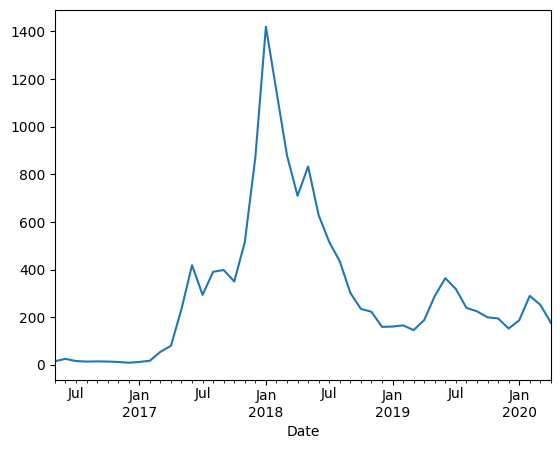

In [81]:
%matplotlib inline
highs.plot()

In [82]:
plot2=df.resample('ME').agg({'High':'max','Low':'min','Volume':'sum','Close':'mean'})

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

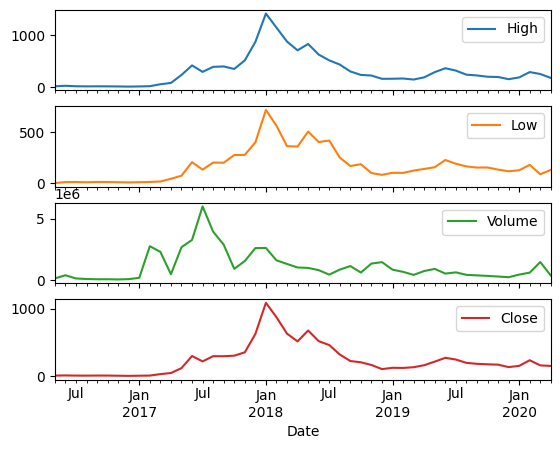

In [83]:
plot2.plot(subplots=True)